In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
product_data_id = 'MLM1000_1000'
df = pd.read_csv(f'./data_warehouse/products/{product_data_id}.csv')

In [3]:
print('Distinct domain_ids',len(df['domain_id'].unique()))
print('Count by domain_id:')
df['domain_id'].value_counts()

Distinct domain_ids 38
Count by domain_id:


MLM-HEADPHONES                                305
MLM-SPEAKERS                                  235
MLM-TELEVISIONS                               132
MLM-SMART_SPEAKERS                            124
MLM-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS        29
MLM-STREAMING_MEDIA_DEVICES                    26
MLM-CELL_BATTERIES                             22
MLM-MICROPHONES                                19
MLM-SOUND_CONSOLES_AND_MIXERS                  12
MLM-DRONES                                     11
MLM-TV_REMOTE_CONTROLS                         10
MLM-LED_STAGE_LIGHTS                           10
MLM-PROJECTORS                                  9
MLM-HOME_THEATERS                               7
MLM-BATTERY_AND_CELL_BATTERIES_CHARGERS         6
MLM-TV_AND_MONITOR_MOUNTS                       6
MLM-SPEAKERS_STANDS                             4
MLM-MINI_COMPONENT_SYSTEMS                      3
MLM-MEGAPHONES                                  3
MLM-TV_ANTENNAS                                 3


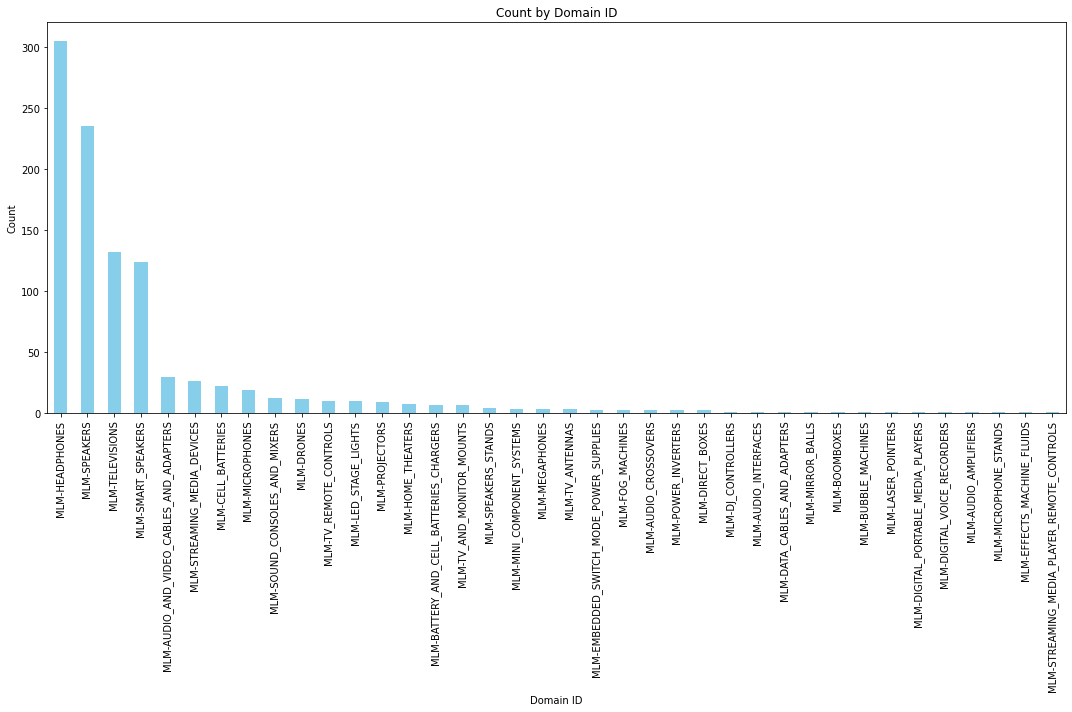

In [4]:
plt.figure(figsize=(15, 10))
df['domain_id'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count by Domain ID')
plt.xlabel('Domain ID')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

In [5]:
print('Distinct brands',len(df['brand'].unique()))
print('Count by brand:')
df['brand'].value_counts().head(20)

Distinct brands 220
Count by brand:


JBL          56
Sony         45
Amazon       43
Hisense      32
Samsung      28
Link Bits    27
Genérica     25
Tronsmart    22
Steelpro     21
1Hora        20
Beats        19
TCL          18
Kaiser       17
HTC          16
Steren       16
Xiaomi       15
Lenovo       14
LG           13
Bose         13
KZ           12
Name: brand, dtype: int64

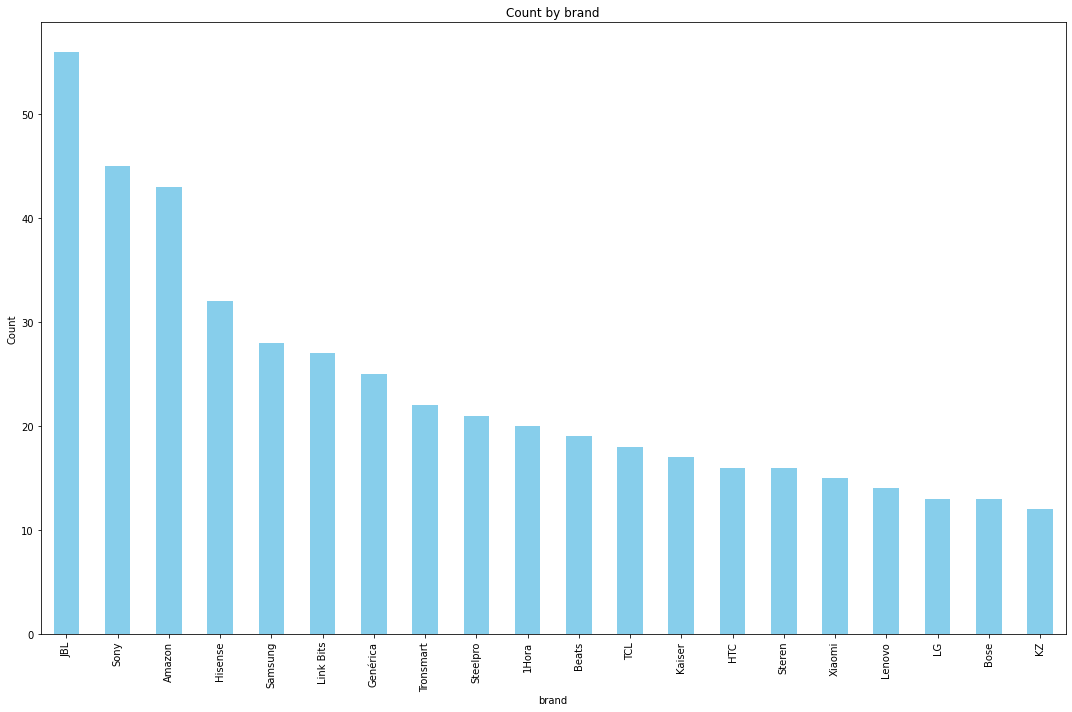

In [6]:
plt.figure(figsize=(15, 10))
df['brand'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Count by brand')
plt.xlabel('brand')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

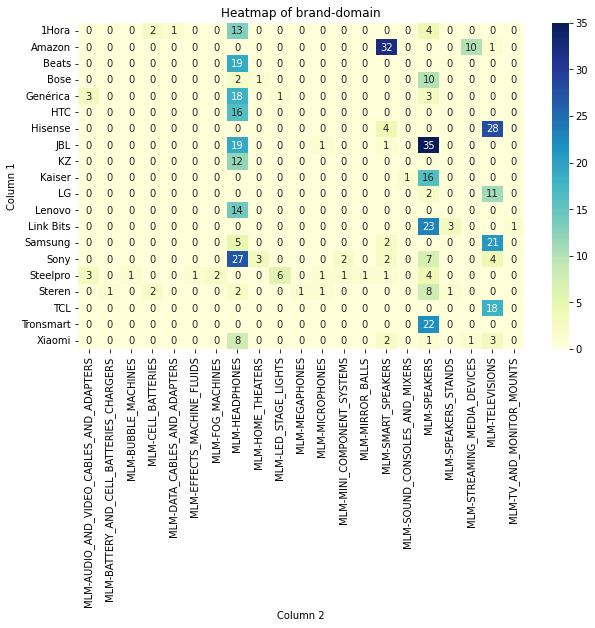

In [7]:
top_brands = df['brand'].value_counts().head(20)
top_brands_index = df['brand'].isin(top_brands.index)

df_b = df[top_brands_index]

pivot_table = df_b.pivot_table(index='brand', columns='domain_id', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of brand-domain')
plt.xlabel('Column 2')
plt.ylabel('Column 1')
plt.show()

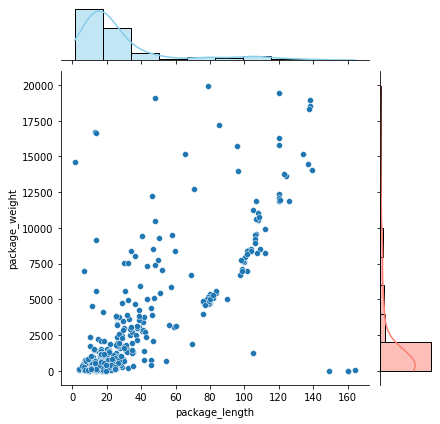

In [11]:
df_c = df.copy().dropna(subset=['package_length', 'package_weight'])

def extract_numbers(string):
    return float(re.search(r'\d+\.*\d*', string).group())

df_c['package_length'] = df_c['package_length'].astype(str).apply(extract_numbers)
df_c['package_weight'] = df_c['package_weight'].astype(str).apply(extract_numbers)

df_c = df_c[df_c['package_length']<400]
df_c = df_c[df_c['package_weight']<20_000]

g = sns.JointGrid(data=df_c, x="package_length", y="package_weight", marginal_ticks=False)

sns.scatterplot(data=df_c, x="package_length", y="package_weight", ax=g.ax_joint)

sns.histplot(data=df_c, x="package_length", ax=g.ax_marg_x, color="skyblue", bins=10, kde=True)
sns.histplot(data=df_c, y="package_weight", ax=g.ax_marg_y, color="salmon", bins=10, kde=True)

plt.show()


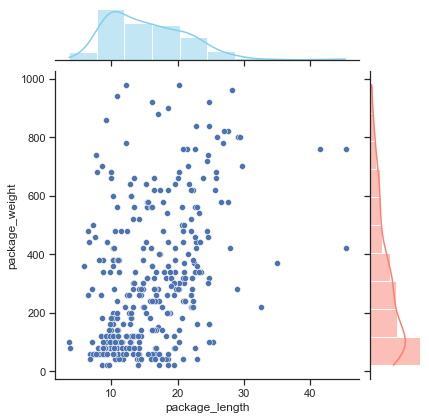

In [99]:
df_c = df.copy().dropna(subset=['package_length', 'package_weight'])

def extract_numbers(string):
    return float(re.search(r'\d+\.*\d*', string).group())

df_c['package_length'] = df_c['package_length'].astype(str).apply(extract_numbers)
df_c['package_weight'] = df_c['package_weight'].astype(str).apply(extract_numbers)

df_c = df_c[df_c['package_length']<50]
df_c = df_c[df_c['package_weight']<1_000]

g = sns.JointGrid(data=df_c, x="package_length", y="package_weight", marginal_ticks=False)

sns.scatterplot(data=df_c, x="package_length", y="package_weight", ax=g.ax_joint)

sns.histplot(data=df_c, x="package_length", ax=g.ax_marg_x, color="skyblue", bins=10, kde=True)
sns.histplot(data=df_c, y="package_weight", ax=g.ax_marg_y, color="salmon", bins=10, kde=True)

plt.show()